In [1]:
!pip install cvzone

In [2]:
import os
import cv2, time
import mediapipe as mp
import matplotlib.pyplot as plt

In [3]:
# class creation
class handDetector():
    def __init__(self, mode=False, maxHands=2, detectionCon=0.5,modelComplexity=1,trackCon=0.5):
        self.mode = mode
        self.maxHands = maxHands
        self.detectionCon = detectionCon
        self.modelComplex = modelComplexity
        self.trackCon = trackCon
        self.mpHands = mp.solutions.hands
        self.hands = self.mpHands.Hands(self.mode, self.maxHands,self.modelComplex,
                                        self.detectionCon, self.trackCon)
        self.mpDraw = mp.solutions.drawing_utils # it gives small dots onhands total 20 landmark points

    def findHands(self,img,draw=True):
        # Send rgb image to hands
        imgRGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
        self.results = self.hands.process(imgRGB) # process the frame
    #     print(results.multi_hand_landmarks)

#         if self.results.multi_hand_landmarks:
#             for handLms in self.results.multi_hand_landmarks:

#                 if draw:
#                     #Draw dots and connect them
#                     self.mpDraw.draw_landmarks(img,handLms,
#                                                 self.mpHands.HAND_CONNECTIONS)

        return img

    def findPosition(self,img, handNo=0, draw=True):
        """Lists the position/type of landmarks
        we give in the list and in the list ww have stored
        type and position of the landmarks.
        List has all the lm position"""

        lmlist = []

        # check wether any landmark was detected
        if self.results.multi_hand_landmarks:
            #Which hand are we talking about
            myHand = self.results.multi_hand_landmarks[handNo]
            # Get id number and landmark information
            for id, lm in enumerate(myHand.landmark):
                # id will give id of landmark in exact index number
                # height width and channel
                h,w,c = img.shape
                #find the position
                cx,cy = int(lm.x*w), int(lm.y*h) #center
                # print(id,cx,cy)
                lmlist.append([id,cx,cy])

                # Draw circle for 0th landmark
#                 if draw:
#                     cv2.circle(img,(cx,cy), 5 , (0,0,255), cv2.FILLED)

        return lmlist

def main():
    #Frame rates
    pTime = 0
    cTime = 0
    cap = cv2.VideoCapture(0)
    detector = handDetector()

    while True:
        success,img = cap.read()
        img = detector.findHands(img)
        lmList = detector.findPosition(img)
        if len(lmList) != 0:
            print(lmList[4])

        cTime = time.time()
        fps = 1/(cTime-pTime)
        pTime = cTime

        cv2.putText(img,str(int(fps)),(10,70), cv2.FONT_HERSHEY_PLAIN,3,(255,0,255),3)

        cv2.imshow("Video",img)
        if cv2.waitKey(1) == 27:
            break

    cap.release()
    cv2.destroyAllWindows()

# if __name__ == "__main__":
#     main()

In [4]:
img_file_list = os.listdir('./samples/')

img_files = []

detector = handDetector()

for i in img_file_list:
    img_path = './samples/' + i
    img_files.append(img_path)
    
# print(img_files)

for i, j in enumerate(img_files):
    img = cv2.imread(j)
    img = detector.findHands(img)
    lmList = detector.findPosition(img)
    
    dx = []
    dy = []
    max_x = None
    min_x = None
    max_y = None
    min_y = None
    
    for n, xy in enumerate(lmList):
        dx.append(xy[1])
        dy.append(xy[2])
        
    max_x = max(dx)
    min_x = min(dx)
    max_y = max(dy)
    min_y = min(dy)

    if len(lmList) != 0:
        print(lmList); print()
    
        cv2.rectangle(img, (min_x - 15, min_y - 15), 
                      (max_x + 15, max_y + 15), (0, 0, 255), 2, cv2.LINE_AA)
        cv2.imshow('img', img)
#         print(multi_hand_landmarks)
#     print(i)
                
    if cv2.waitKey() == 27:
        break
        
cv2.destroyAllWindows()

[[0, 86, 201], [1, 60, 189], [2, 44, 166], [3, 38, 145], [4, 31, 129], [5, 66, 134], [6, 56, 107], [7, 51, 90], [8, 48, 76], [9, 81, 131], [10, 78, 101], [11, 77, 81], [12, 77, 64], [13, 96, 135], [14, 98, 107], [15, 100, 88], [16, 101, 72], [17, 109, 144], [18, 115, 123], [19, 117, 109], [20, 119, 96]]

[[0, 85, 203], [1, 59, 190], [2, 43, 166], [3, 37, 145], [4, 30, 128], [5, 64, 134], [6, 55, 108], [7, 49, 92], [8, 46, 77], [9, 80, 131], [10, 77, 100], [11, 76, 81], [12, 75, 64], [13, 95, 136], [14, 97, 106], [15, 98, 88], [16, 99, 72], [17, 109, 145], [18, 114, 124], [19, 115, 109], [20, 116, 95]]

[[0, 86, 203], [1, 60, 190], [2, 44, 166], [3, 37, 145], [4, 29, 128], [5, 64, 134], [6, 55, 108], [7, 49, 91], [8, 46, 77], [9, 80, 131], [10, 77, 100], [11, 75, 81], [12, 75, 64], [13, 95, 135], [14, 97, 106], [15, 98, 88], [16, 99, 72], [17, 109, 145], [18, 114, 123], [19, 115, 109], [20, 116, 95]]



In [5]:
dx = []
dy = []

for n, xy in enumerate(lmList):
    dx.append(xy[1])
    dy.append(xy[2])
    
print(dx)
print(dy); print()

max_x = max(dx)
min_x = min(dx)
max_y = max(dy)
min_y = min(dy)

print('max_x = ', max_x, '\t', 'min_x = ', min_x)
print('max_y = ', max_y, '\t', 'min_x = ', min_y)

[86, 60, 44, 37, 29, 64, 55, 49, 46, 80, 77, 75, 75, 95, 97, 98, 99, 109, 114, 115, 116]
[203, 190, 166, 145, 128, 134, 108, 91, 77, 131, 100, 81, 64, 135, 106, 88, 72, 145, 123, 109, 95]

max_x =  116 	 min_x =  29
max_y =  203 	 min_x =  64


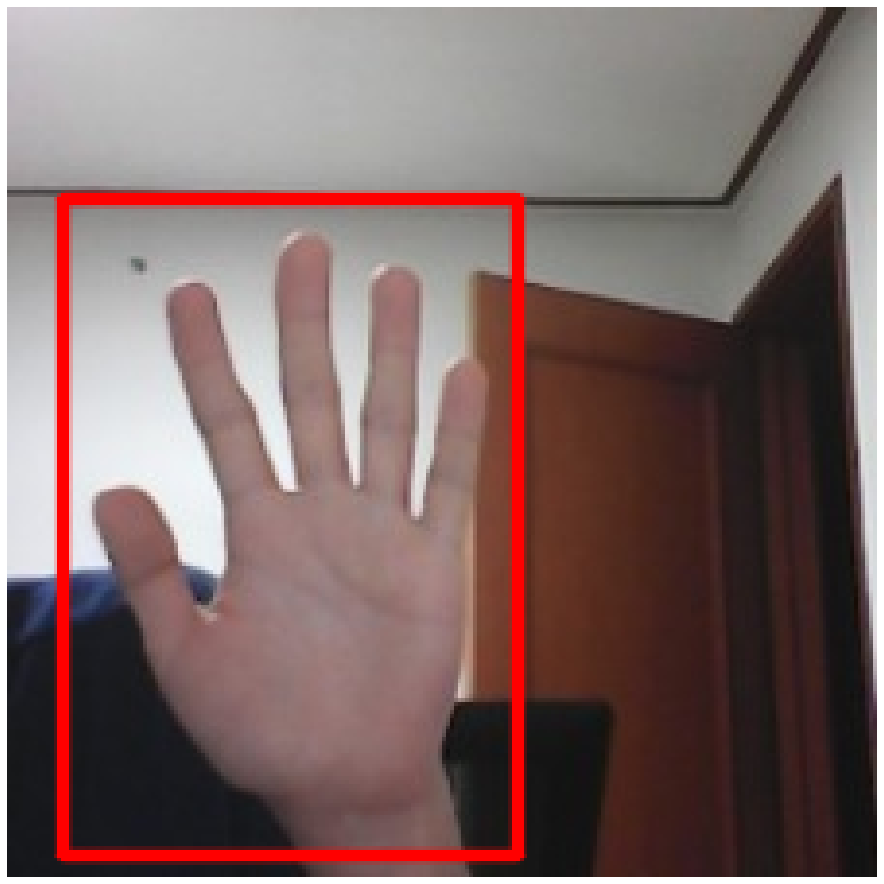

In [7]:
img = cv2.imread('./samples/2.jpg')

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img_result = img.copy()
# cv2.circle(img_result, (86, 203), 3, (255, 0, 0), -1, cv2.LINE_AA)

cv2.rectangle(img_result, (min_x - 15, min_y - 15), (max_x + 15, max_y + 15), (255, 0, 0), 2, cv2.LINE_AA)

img_out = cv2.cvtColor(img_result, cv2.COLOR_RGB2BGR)

plt.figure(figsize = (16, 16)), plt.axis('off')
plt.imshow(img_result)